<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откроем-и-изучим-файлы" data-toc-modified-id="Откроем-и-изучим-файлы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем и изучим файлы</a></span></li><li><span><a href="#Корректность-расчёта-обогащения" data-toc-modified-id="Корректность-расчёта-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Корректность расчёта обогащения</a></span></li><li><span><a href="#Доступность-признаков-в-тестовой-выборке" data-toc-modified-id="Доступность-признаков-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Доступность признаков в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Динамика-концентрации-металлов-на-различных-этапах-очистки" data-toc-modified-id="Динамика-концентрации-металлов-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Динамика концентрации металлов на различных этапах очистки</a></span></li><li><span><a href="#Распределение-размеров-гранул-сырья" data-toc-modified-id="Распределение-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-веществ-на-разных-стадиях" data-toc-modified-id="Суммарная-концентрация-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация веществ на разных стадиях</a></span></li><li><span><a href="#Анализ-таргетов" data-toc-modified-id="Анализ-таргетов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ таргетов</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Создание-функций" data-toc-modified-id="Создание-функций-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание функций</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Модель-для-чернового-концентрата" data-toc-modified-id="Модель-для-чернового-концентрата-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Модель для чернового концентрата</a></span></li><li><span><a href="#Модель-для-финального-концентрата" data-toc-modified-id="Модель-для-финального-концентрата-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Модель для финального концентрата</a></span></li><li><span><a href="#Работа-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Работа-лучшей-модели-на-тестовой-выборке-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Работа лучшей модели на тестовой выборке</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [1]:
! pip install catboost

In [2]:
import pandas as pd

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.impute import KNNImputer
from sklearn.model_selection import validation_curve, learning_curve, cross_val_score, GridSearchCV

from catboost import CatBoostRegressor, cv, Pool

import warnings

In [3]:
warnings.filterwarnings("ignore")

### Откроем и изучим файлы

In [4]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
train.name = 'Обучающая выборка'
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
test.name = 'Тестовая выборка'
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
full.name = 'Исходные данные'

datasets =[train, test, full]

In [5]:
for ds in datasets:
    print(f'{ds.name} | размер датасета {ds.shape}')
    ds.info()

Обучающая выборка | размер датасета (14149, 87)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol       

Все признаки имеют числовые значения, за исключением индексирующего признака `data`, внушительное количество признаков (87) в обучающей выборке. Количество признаков в тестовой выборке значитьльно меньше (53), вероятно они являются результатами работ на стадиях процесса.

In [6]:
def get_missing_values(df):
    #Возвращает таблицу с количеством и долей пропусков в датафрейме

    data = (
        df.isna()
        .sum()
        .rename("missing_count")
        .to_frame()
        .join(df.isna().mean().rename("missing_ratio").to_frame())
        .sort_values(by="missing_count", ascending=False)
        # Удаляем данные о столбцах, где количество пропусков равняется 0
        .loc[lambda x: x["missing_count"] > 0]
    )
    return data

In [7]:
for ds in datasets:
    print(f'------- {ds.name} -------')
    print("Количество пропусков:")
    display(get_missing_values(ds))

------- Обучающая выборка -------
Количество пропусков:


,missing_count,missing_ratio
secondary_cleaner.output.tail_sol,1605,0.113436
rougher.state.floatbank10_e_air,436,0.030815
rougher.input.floatbank11_xanthate,428,0.030249
primary_cleaner.output.concentrate_sol,286,0.020213
secondary_cleaner.state.floatbank2_a_air,217,0.015337
...,...,...
primary_cleaner.output.tail_ag,1,0.000071
final.output.concentrate_ag,1,0.000071
rougher.calculation.sulfate_to_au_concentrate,1,0.000071
rougher.output.tail_ag,1,0.000071


------- Тестовая выборка -------
Количество пропусков:


,missing_count,missing_ratio
rougher.input.floatbank11_xanthate,25,0.004726
rougher.input.feed_sol,21,0.003970
secondary_cleaner.state.floatbank3_a_air,9,0.001701
rougher.input.floatbank11_sulfate,8,0.001512
primary_cleaner.input.depressant,5,0.000945
rougher.input.floatbank10_sulfate,5,0.000945
primary_cleaner.input.xanthate,4,0.000756
primary_cleaner.input.sulfate,4,0.000756
rougher.input.feed_rate,3,0.000567
secondary_cleaner.state.floatbank2_a_air,3,0.000567


------- Исходные данные -------
Количество пропусков:


,missing_count,missing_ratio
secondary_cleaner.output.tail_sol,1748,0.089922
rougher.input.floatbank11_xanthate,453,0.023304
rougher.state.floatbank10_e_air,436,0.022429
primary_cleaner.output.concentrate_sol,370,0.019034
secondary_cleaner.state.floatbank2_a_air,220,0.011317
...,...,...
primary_cleaner.state.floatbank8_b_level,1,0.000051
primary_cleaner.state.floatbank8_a_level,1,0.000051
primary_cleaner.state.floatbank8_d_level,1,0.000051
rougher.output.tail_ag,1,0.000051


In [8]:
print(train.duplicated().sum())
print(test.duplicated().sum())
print(full.duplicated().sum())

0
0
0


Полные дубликаты отсутствуют.

Тренировочный датасет имеет пропуски:
- `secondary_cleaner.output.tail_sol` 11% 
- `rougher.state.floatbank10_e_air` и `rougher.input.floatbank11_xanthate` около 3%
- `primary_cleaner.output.concentrate_sol`, `secondary_cleaner.state.floatbank2_a_air` и `final.output.concentrate_sol`около 2%
- ряд признаков около 1%
- тестовые данные имеют пропуски менее 1%

### Корректность расчёта обогащения

In [9]:
C = train['rougher.output.concentrate_au'] # доля золота в концентрате после флотации/очистки
F = train['rougher.input.feed_au'] # доля золота в сырье/концентрате до флотации/очистки;
T = train['rougher.output.tail_au'] # доля золота в отвальных хвостах после флотации/очистки

train['rougher.output.recovery_calculated'] = C * (F - T) / (F * (C - T)) * 100

mae_t = mean_absolute_error(train['rougher.output.recovery'], train['rougher.output.recovery_calculated'])

print(f'MAE этапа "rougher.ouput.recovery" = {mae_t}')

MAE этапа "rougher.ouput.recovery" = 9.73512347450521e-15


Ошибка имеет крайне низкий порядок, эффективность обогащения рассчитана правильно.

### Доступность признаков в тестовой выборке

In [10]:
# cols_diff = []
# for col in train.columns:
#     if col not in test.columns.values:
#         print(col)
#         cols_diff.append(col)
        

In [11]:
train.columns.difference(test.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

В тестовом датасете отсутствуют данные:
- фактические финальные концентрации ag, pb, sol, au;
- фактические финальные концентрации ag, pb, sol, au отвальных хвостов;
- фактические концетрации ag, pb, sol, au в результате первичной очистки (включая отвальные хвосты);
- фактические концентрации ag, pb, sol, au в результате вторичной очистки;
- фактические концентрации ag, pb, sol, au в результате флотации (включая отвальыне хвосты);
- несколько расчётных характеристик процесса флотации.

Большинство отсутствующих характеристик относятся к output'ам, вероятно они отсутствуют в тестовом датасете для того, чтобы модель не "подглядывала" при осуществлении предикта на фактические результаты работы на стадиях очистки.

### Предобработка данных

In [12]:
train = train.set_index('date')
test = test.set_index('date')
full = full.set_index('date')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [14]:
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')
full = full.fillna(method='ffill')

## Анализ данных

### Динамика концентрации металлов на различных этапах очистки

In [15]:
# Список металлов
metals = ['_au', '_ag', '_pb']

In [16]:
# Стадии
stages = ['rougher.input.feed', # Перед флотацией
          'rougher.output.concentrate', # Перед первичной очисткой
          'primary_cleaner.output.concentrate', # Перед вторичной очисткой
          'final.output.concentrate'] # Финальная концентрация

stages_rus = ['Флотация', 'Первичная очистка', 'Вторичная очистка', 'Финальная']

In [17]:
concentrations = []
for metal in metals:
    stages_new = []
    for stage in stages:
        stages_new.append(stage+metal)
    concentrations.append(full[stages_new].mean())
#print(concentrations)

In [18]:
matplotlib.rcParams.update({'font.size': 14}) # размер шрифта на графиках

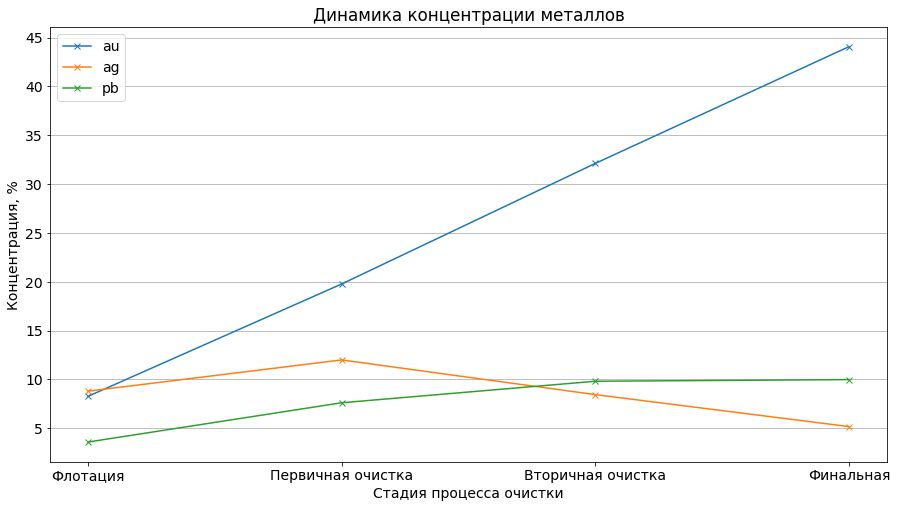

In [19]:
plt.figure(figsize=(15, 8))

plt.title('Динамика концентрации металлов')
plt.xlabel('Стадия процесса очистки')
plt.ylabel('Концентрация, %')

for i in range(len(metals)):
    plt.plot(stages_rus, concentrations[i],'x-',label=metals[i][1:], linewidth=1.5)

plt.grid(axis='y')
plt.legend()
plt.show()

С каждым этапом очистки концентрация:
- золота - значительно растёт;
- свинца - незначительно растёт;
- серебра - растёт после флотации, затем - снижается.

### Распределение размеров гранул сырья

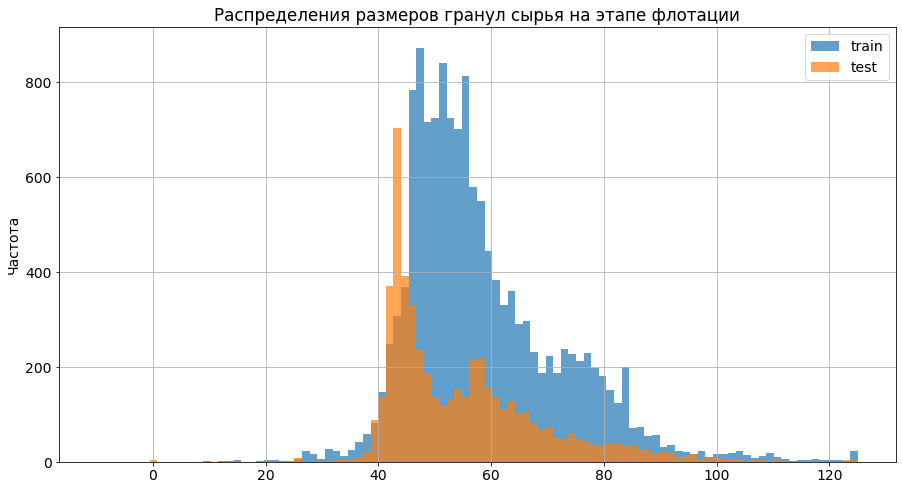

In [20]:
plt.figure(figsize=(15, 8))

plt.hist(train['rougher.input.feed_size'], bins=100, range=(-10, 125), label='train', alpha=0.7);
plt.hist(test['rougher.input.feed_size'], bins=100, range=(-10, 125), label='test', alpha=0.7);

plt.title('Распределения размеров гранул сырья на этапе флотации')
plt.ylabel('Частота')
plt.grid()
plt.legend()
plt.show()

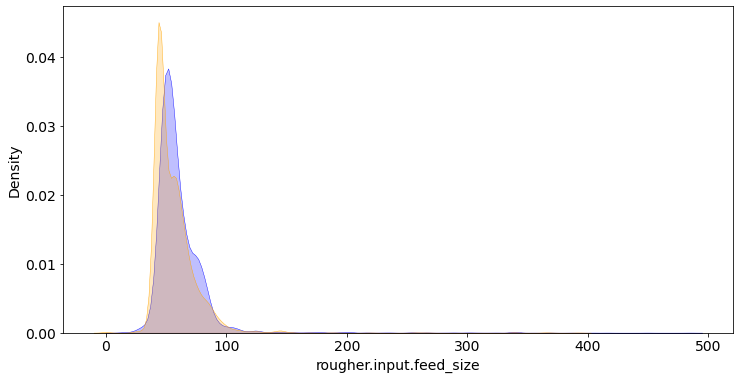

In [21]:
plt.figure(figsize=(12,6))

sns.kdeplot(data=train, x='rougher.input.feed_size', color='blue', shade=True,linewidth=0.4)
sns.kdeplot(data=test, x='rougher.input.feed_size', color='orange', shade=True,linewidth=0.4);

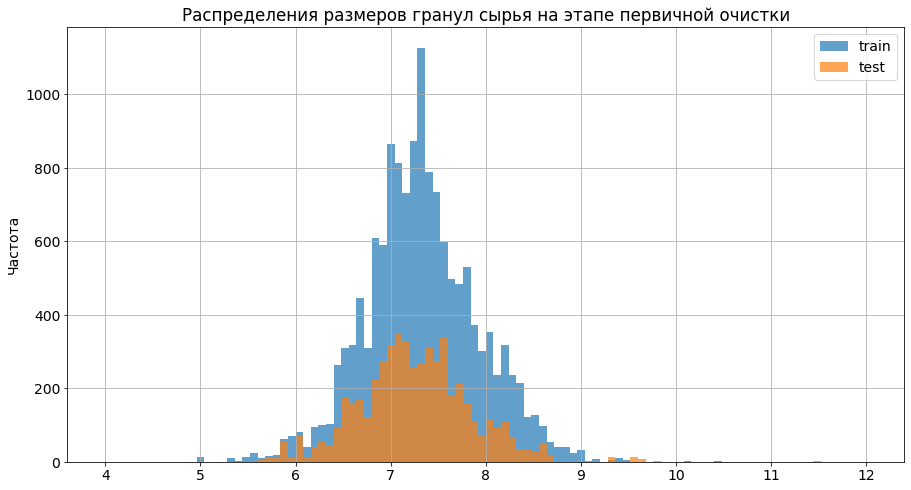

In [22]:
plt.figure(figsize=(15, 8))

plt.hist(train['primary_cleaner.input.feed_size'], bins=100, range=(4,12), label='train', alpha=0.7);
plt.hist(test['primary_cleaner.input.feed_size'], bins=100, range=(4,12), label='test', alpha=0.7);

plt.title('Распределения размеров гранул сырья на этапе первичной очистки')
plt.ylabel('Частота')
plt.grid()
plt.legend()
plt.show()

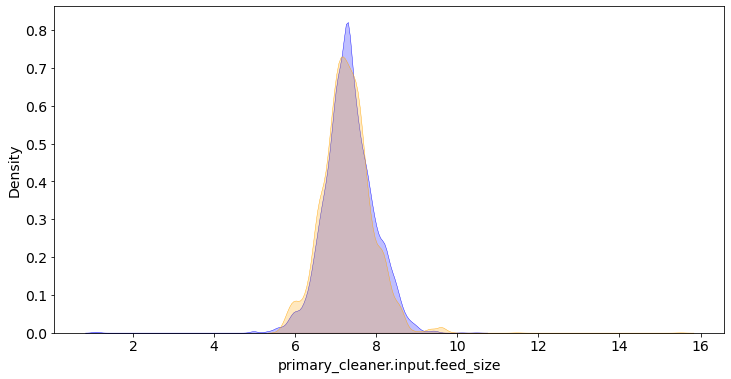

In [23]:
plt.figure(figsize=(12,6))

sns.kdeplot(data=train, x='primary_cleaner.input.feed_size', color='blue', shade=True,linewidth=0.4)
sns.kdeplot(data=test, x='primary_cleaner.input.feed_size', color='orange', shade=True,linewidth=0.4);

Распределения похожи.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Вывод верный!</font>

### Суммарная концентрация веществ на разных стадиях

In [24]:
metals_conc = ['_au', '_ag', '_pb', '_sol']
stages_conc = ['rougher.input.feed', # Перед флотацией
               'rougher.output.concentrate', # Перед первичной очисткой
               'final.output.concentrate'] # Финальная концентрация

stages_rus_conc = ['Сырьё', 'Черновой концентрат', 'Финальный концентрат']

In [25]:
concentrations_total = []    
for stage in stages_conc:
    _ = 0
    for metal in metals_conc:
        _ += full[stage+metal]
    concentrations_total.append(_)

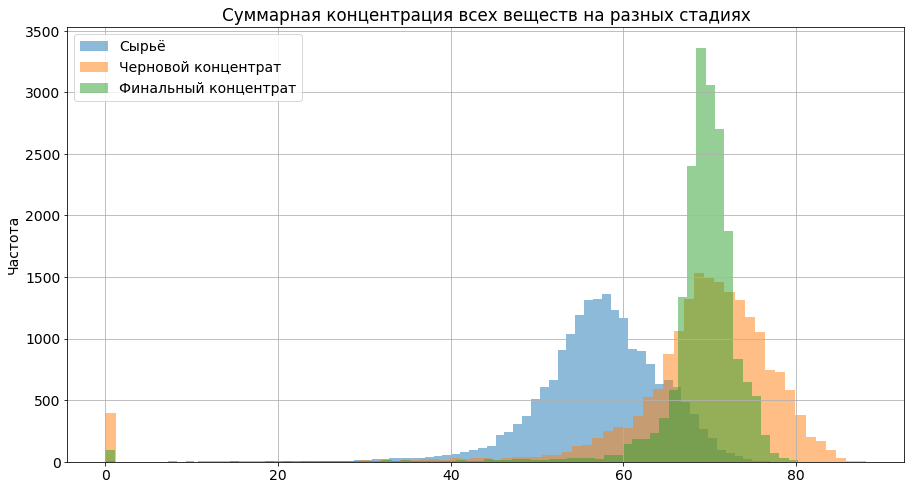

In [26]:
plt.figure(figsize=(15, 8))

for i in range(3):
    plt.hist(concentrations_total[i], bins=75, label=stages_rus_conc[i], alpha=0.5);

plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.ylabel('Частота')
plt.grid()
plt.legend()
plt.show()

In [27]:
train.shape

(14149, 87)

In [28]:
train = train[((train['rougher.output.concentrate_au'] +
                train['rougher.output.concentrate_ag'] +
                train['rougher.output.concentrate_pb'] +
                train['rougher.output.concentrate_sol'] != 0) &
               (train['final.output.concentrate_ag'] +
                train['final.output.concentrate_pb'] +
                train['final.output.concentrate_pb'] +
                train['final.output.concentrate_sol'] != 0)
              )]

In [29]:
train.shape

(13795, 87)

Было удалено 354 записи (~2.5%)

### Анализ таргетов

In [30]:
# Посмотрим на взаимную зависимость таргетов

print("Корреляция между черновым и финальным концентратами:")
for meth in ['spearman', 'pearson']:
    print(f"{meth:8} | {full['final.output.recovery'].corr(full['rougher.output.recovery'], method = meth): .2f}")  

Корреляция между черновым и финальным концентратами:
spearman |  0.62
pearson  |  0.33


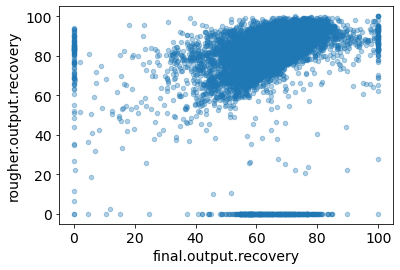

In [31]:
full.plot(kind ='scatter', x='final.output.recovery', y='rougher.output.recovery', alpha=0.35);

Наблюдаются аномалии в точках 0-ой и 100-ой концентраций.

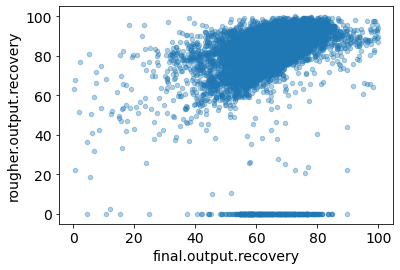

In [32]:
(full[(full['final.output.recovery'] < 100) & (full['final.output.recovery'] > 0)]
    .plot(kind ='scatter', x='final.output.recovery', y='rougher.output.recovery', alpha=0.35)
);

Посмотрим на зависимость между таргетами и признаками на различных этапах процесса

In [33]:
def get_target_correlation(df, target_col_name):
    """Возвращает таблицу корреляции с целевым признаком.

    1-й столбец - коэффициенты Spearman
    2-й столбец - коэффициенты Pearson
    """
    corr_table = (
        df
        # Столбец с корреляцией Спирмена
        .corr(method='spearman')[target_col_name]
        .drop([target_col_name])
        .rename('Spearman')
        .to_frame()
        # Добавляем столбец с корреляцией Пирсона(фокус на лин.зависимости)
        .join(
            df.corr()[target_col_name]
            .drop([target_col_name])
            .rename('Pearson')
            .to_frame()
        )
        .sort_values(by='Spearman')
    )
    return corr_table

In [34]:
# Объединим две таблицы, посмотрим как различаются корреляции признаков
corr_matrix = (get_target_correlation(train.drop('final.output.recovery', axis=1), 'rougher.output.recovery')
                     .drop('Spearman', axis=1)
                     .join(
                           (get_target_correlation(train.drop('rougher.output.recovery', axis=1), 'final.output.recovery')
                              .drop('Spearman', axis=1)
                           ),
                           lsuffix = '_rough', rsuffix = '_final'))

In [35]:
print('Зависимость целевых признаков от входных параметров этапа ФЛОТАЦИИ (rougher)')
corr_matrix[corr_matrix.index.str.contains('rougher.input')].style.background_gradient(cmap='coolwarm')  

Зависимость целевых признаков от входных параметров этапа ФЛОТАЦИИ (rougher)


,Pearson_rough,Pearson_final
rougher.input.floatbank11_sulfate,-0.012385,0.006566
rougher.input.floatbank10_sulfate,-0.014977,-0.014674
rougher.input.feed_rate,0.075587,0.149483
rougher.input.feed_size,0.089841,0.048465
rougher.input.floatbank11_xanthate,0.260303,0.300404
rougher.input.floatbank10_xanthate,0.297281,0.327414
rougher.input.feed_sol,0.356818,0.265578
rougher.input.feed_au,0.364890,0.339028
rougher.input.feed_ag,0.395638,0.334986
rougher.input.feed_pb,0.385500,0.222786


Финальный концентрат сильнее зависит от параментров на входе, чем черновой.

In [36]:
print('Зависимость целевых признаков от входных параметров этапа ПЕРВИЧНОЙ ОЧИСТКИ (primary_cleaner)')
corr_matrix[corr_matrix.index.str.contains('primary_cleaner.input')].style.background_gradient(cmap='coolwarm')  

Зависимость целевых признаков от входных параметров этапа ПЕРВИЧНОЙ ОЧИСТКИ (primary_cleaner)


,Pearson_rough,Pearson_final
primary_cleaner.input.feed_size,-0.045697,0.069590
primary_cleaner.input.depressant,0.131891,0.151633
primary_cleaner.input.xanthate,0.184646,0.211906
primary_cleaner.input.sulfate,0.432972,0.382984


Аналогичные отличия в корреляции.

In [37]:
print('Зависимость целевых признаков от параметров СОСТОЯНИЯ на этапе ФЛОТАЦИИ')
(corr_matrix[corr_matrix.index.str.contains('state')]
     .query('index.str.contains("10")')
     .sort_values(by='Pearson_rough')
     .style.background_gradient(cmap='coolwarm') 
)

Зависимость целевых признаков от параметров СОСТОЯНИЯ на этапе ФЛОТАЦИИ


,Pearson_rough,Pearson_final
rougher.state.floatbank10_d_air,-0.336720,-0.188977
rougher.state.floatbank10_c_air,-0.336585,-0.194062
rougher.state.floatbank10_b_air,-0.287144,-0.155803
rougher.state.floatbank10_e_air,-0.248112,-0.141340
rougher.state.floatbank10_d_level,-0.188227,-0.095529
rougher.state.floatbank10_b_level,-0.187581,-0.085882
rougher.state.floatbank10_c_level,-0.186915,-0.096035
rougher.state.floatbank10_f_level,-0.185394,-0.094071
rougher.state.floatbank10_e_level,-0.184944,-0.097401
rougher.state.floatbank10_f_air,-0.182496,-0.102466


Ряд признаков показывают слабую корреляцию, возможно мы не будем использовать ограниченный список признаков параметров состояния в даленейшем.

In [38]:
print("Зависимость целевых признаков от параметров СОСТОЯНИЯ на этапах ОЧИСТКИ")
(corr_matrix[corr_matrix.index.str.contains('state')]
     .sort_values(by='Pearson_final')
     .style.background_gradient(cmap='coolwarm') 
)

Зависимость целевых признаков от параметров СОСТОЯНИЯ на этапах ОЧИСТКИ


,Pearson_rough,Pearson_final
rougher.state.floatbank10_c_air,-0.336585,-0.194062
rougher.state.floatbank10_d_air,-0.336720,-0.188977
rougher.state.floatbank10_b_air,-0.287144,-0.155803
rougher.state.floatbank10_e_air,-0.248112,-0.141340
rougher.state.floatbank10_f_air,-0.182496,-0.102466
secondary_cleaner.state.floatbank4_b_level,-0.041753,-0.100679
rougher.state.floatbank10_e_level,-0.184944,-0.097401
rougher.state.floatbank10_c_level,-0.186915,-0.096035
rougher.state.floatbank10_d_level,-0.188227,-0.095529
rougher.state.floatbank10_f_level,-0.185394,-0.094071


C финальным концентратом показатели корреляции в целом выше.  
Параметры с очень низкими показателями мы попробуем отфильтровать на этапе моделирования.

Присутствует взаимосвязь двух таргетов, в этой связи мы будем использовать две модели.  
Для предсказания чернового концентрата мы не будем использовать данные, полученные по процессу после проведения флотации.

## Модель

In [39]:
RANDOM_STATE=11363
RANDOM_SEED=11363

In [40]:
# Сформируем список фичей, который мы будем использовать, таргеты и отфильтруем обучающую выборку.
# Также добавим в тестовую выборку таргеты 'rougher.output.recovery', 'final.output.recovery'
X = test.columns
y_1 = ['rougher.output.recovery']
y_2 = ['final.output.recovery']
train = train[set(X).union({'rougher.output.recovery', 'final.output.recovery'})]
test = test.merge(full[['rougher.output.recovery', 'final.output.recovery']], how='left',left_index=True, right_index=True)

### Создание функций

In [41]:
def smape_error(target, predict):
    target=np.array(target)
    predict=np.array(predict)
    total = 0
    for i in range(len(target)):
        total += abs(target[i] - predict[i]) / ((abs(target[i]) + abs(predict[i]))/2)
    return -total * 100 / len(target)

In [42]:
# Создадим новую функцию для оценки ошибки с весами 1:3 для концентраций золота на этапах флотации и финальном.

def total_smape(rougher_smape, final_smape):
    total = rougher_smape * 0.25 + final_smape * 0.75
    return total

In [43]:
smape_scorer = make_scorer(smape_error)

In [44]:
# Создадим функцию для отображения кривых валидации

def plot_learning_curve(title, model, features, target, score, train_sizes):

    train_sizes, train_scores, validation_scores = learning_curve(
        estimator=model,
        X=features,
        y=target,
        scoring=score,
        train_sizes=TRAIN_SIZES,
        shuffle=True,
        cv=5,
    )

    # Берем метрики качества модели, полученные для  значений train_sizes
    # Вычисляем по ним среднее арифметическое для графиков кривых
    train_scores_mean = train_scores.mean(axis=1)
    validation_scores_mean = validation_scores.mean(axis=1)

    plt.style.use('seaborn-notebook')
    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, validation_scores_mean, label='Validation error')
    plt.ylabel(score, fontsize=13)
    plt.xlabel('Training set size', fontsize=13)
    plt.title(title, fontsize=13, y=1.02)
    plt.legend()
    plt.ylim(-12, -2)
    plt.grid(True)

    plt.show()

In [45]:
TRAIN_SIZES = range(1000, 11000, 500)

In [46]:
# Очистим данные от аутлаеров в таргетах
print(f'Формат обучающей выборки: {train.shape}')
train = train[(train['final.output.recovery'] != 0) & (train['final.output.recovery'] != 100) & (train['rougher.output.recovery'] != 0)]
print(f'Формат обучающей выборки после удаления аутлаеров в таргетах: {train.shape}\n\n')

# print(f'Формат тестовой выборки: {test.shape}')
# test = test[(test['final.output.recovery'] != 0) & (test['final.output.recovery'] != 100) & (test['rougher.output.recovery'] != 0)]
# print(f'Формат тестовой выборки после удаления аутлаеров в таргетах: {test.shape}')

Формат обучающей выборки: (13795, 54)
Формат обучающей выборки после удаления аутлаеров в таргетах: (13721, 54)




### Линейная регрессия

In [47]:
model = LinearRegression()

print(f'==> Результаты предсказаний {model}:\n')

smape_rough = cross_val_score(model, train[X], train[y_1], cv=5, scoring = smape_scorer).mean() * (-1)
print(" для ЧЕРНОВОГО концентрата:")
print(f" {smape_rough :.2f}\n")

smape_final = cross_val_score(model, train[X], train[y_2], cv=5, scoring = smape_scorer).mean() * (-1)
print(' для ФИНАЛЬНОГО концентрата:')
print(f' {smape_final :.2f}\n')

print(' результирующий sMAPE:')
print(f' {total_smape(smape_rough, smape_final):.2f}')

==> Результаты предсказаний LinearRegression():

 для ЧЕРНОВОГО концентрата:
 7.18

 для ФИНАЛЬНОГО концентрата:
 10.72

 результирующий sMAPE:
 9.84


Примем эти результаты за baseline.

In [48]:
models_results = pd.DataFrame(index = ['score_rough', 'score_final', 'score_total'])
models_results['1_base_model(LR)'] = [smape_rough, smape_final, total_smape(smape_rough, smape_final)]
models_results

,1_base_model(LR)
score_rough,7.178800
score_final,10.723519
score_total,9.837339


### Решающее дерево

In [49]:
max_depth = 2
model = DecisionTreeRegressor(max_depth=max_depth, random_state=RANDOM_STATE)

print(f'==> Результаты предсказаний {model}\n')

smape_rough = cross_val_score(model, train[X], train[y_1], cv=5, scoring = smape_scorer).mean() * (-1)
print(' для ЧЕРНОВОГО концентрата:')
print(f' {smape_rough:.2f}\n')

smape_final = cross_val_score(model, train[X], train[y_2], cv=5, scoring = smape_scorer).mean() * (-1)
print(' для ФИНАЛЬНОГО концентрата:')
print(f' {smape_final :.2f}\n')

print(' результирующий sMAPE:')
print(f' {total_smape(smape_rough, smape_final):.2f}')

==> Результаты предсказаний DecisionTreeRegressor(max_depth=2, random_state=11363)

 для ЧЕРНОВОГО концентрата:
 7.64

 для ФИНАЛЬНОГО концентрата:
 9.34

 результирующий sMAPE:
 8.92


In [50]:
# Попробуем взять меньшую глубину
max_depth = 1
model = DecisionTreeRegressor(max_depth=max_depth, random_state=RANDOM_STATE)

print(f'==> Результаты предсказаний {model}\n')

smape_rough = cross_val_score(model, train[X], train[y_1], cv=5, scoring = smape_scorer).mean() * (-1)
print(' для ЧЕРНОВОГО концентрата:')
print(f' {smape_rough :.2f}\n')


smape_final = cross_val_score(model, train[X], train[y_2], cv=5, scoring = smape_scorer).mean() * (-1)
print(' для ФИНАЛЬНОГО концентрата:')
print(f' {smape_final :.2f}\n')

print(' результирующий sMAPE:')
print(f' {total_smape(smape_rough, smape_final):.2f}')

==> Результаты предсказаний DecisionTreeRegressor(max_depth=1, random_state=11363)

 для ЧЕРНОВОГО концентрата:
 8.09

 для ФИНАЛЬНОГО концентрата:
 9.81

 результирующий sMAPE:
 9.38


In [51]:
models_results['2_DecisionTree'] = [smape_rough, smape_final, total_smape(smape_rough, smape_final)]
models_results

,1_base_model(LR),2_DecisionTree
score_rough,7.178800,8.089410
score_final,10.723519,9.814606
score_total,9.837339,9.383307


### Случайный лес

In [52]:
max_depth = 1
model = RandomForestRegressor(max_depth=max_depth, random_state=RANDOM_STATE)

print(f'==> Результаты предсказаний {model}\n')

smape_rough = cross_val_score(model, train[X], train[y_1], cv=5, scoring = smape_scorer).mean() * (-1)
print(' для ЧЕРНОВОГО концентрата:')
print(f' {smape_rough :.2f}\n')

smape_final = cross_val_score(model, train[X], train[y_2], cv=5, scoring = smape_scorer).mean() * (-1)
print(' для ФИНАЛЬНОГО концентрата:')
print(f' {smape_final :.2f}\n')

print(' результирующий sMAPE:')
print(f' {total_smape(smape_rough, smape_final):.2f}')

==> Результаты предсказаний RandomForestRegressor(max_depth=1, random_state=11363)

 для ЧЕРНОВОГО концентрата:
 7.64

 для ФИНАЛЬНОГО концентрата:
 9.61

 результирующий sMAPE:
 9.12


In [53]:
models_results['3_RandomForest'] = [smape_rough, smape_final, total_smape(smape_rough, smape_final)]
models_results

,1_base_model(LR),2_DecisionTree,3_RandomForest
score_rough,7.178800,8.089410,7.637065
score_final,10.723519,9.814606,9.614325
score_total,9.837339,9.383307,9.120010


### CatBoost

In [54]:
# Создадим свой скорринг для CatBoost
class CatBoostSmapeScoring(object):
    
    def smape_error(self, target, predict):
        target=np.array(target)
        predict=np.array(predict)
        total = 0
        for i in range(len(target)):
            total += abs(target[i] - predict[i]) / ((abs(target[i]) + abs(predict[i]))/2)
        return total * 100 / len(target)

    def get_final_error(self, error, weight):
        return error

    def is_max_optimal(self):
        # the larger metric value the better - in our case it should be False
        return False

    def evaluate(self, approxes, target, weight):
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])
        preds = np.array(approxes[0])
        target = np.array(target)
        score = self.smape_error(target, preds)
        return score, 0

In [55]:
cat_features = []

params = {'cat_features': cat_features,
          'eval_metric': CatBoostSmapeScoring(),
          'loss_function': 'MAPE',
          'random_seed': RANDOM_SEED,
          'verbose': 100,
          'early_stopping_rounds': 100,
          'learning_rate':0.15}

model = CatBoostRegressor(**params)

In [56]:
train_data_1 = Pool(data=train[X],
                    label=train[y_1],
                    cat_features=cat_features)

train_data_2 = Pool(data=train[X],
                    label=train[y_2],
                    cat_features=cat_features)

In [57]:
cv_data = cv(
    params=params,
    pool=train_data_1,
    fold_count=5,
    shuffle=True,
    partition_random_seed=RANDOM_SEED,
)

Training on fold [0/5]
0:	learn: 147.4309945	test: 147.4386214	best: 147.4386214 (0)	total: 615ms	remaining: 10m 14s
100:	learn: 3.6892903	test: 3.9480093	best: 3.9480093 (100)	total: 8.33s	remaining: 1m 14s
200:	learn: 3.3236191	test: 3.7248680	best: 3.7248680 (200)	total: 15.8s	remaining: 1m 2s
300:	learn: 3.1376362	test: 3.6175761	best: 3.6175761 (300)	total: 23.3s	remaining: 54.1s
400:	learn: 3.0648096	test: 3.5903954	best: 3.5890462 (388)	total: 30.6s	remaining: 45.6s
500:	learn: 3.0192843	test: 3.5681373	best: 3.5674551 (498)	total: 37.9s	remaining: 37.8s
600:	learn: 2.9842207	test: 3.5547133	best: 3.5501980 (593)	total: 45.2s	remaining: 30s
700:	learn: 2.9541868	test: 3.5435113	best: 3.5425651 (696)	total: 52.5s	remaining: 22.4s
800:	learn: 2.9151949	test: 3.5226556	best: 3.5222237 (787)	total: 59.7s	remaining: 14.8s
900:	learn: 2.8970201	test: 3.5187992	best: 3.5174560 (859)	total: 1m 6s	remaining: 7.36s
999:	learn: 2.8684613	test: 3.5079602	best: 3.5067751 (969)	total: 1m 14s	

CatBoost показывает значительно лучшие результаты на черновом концентрате.

In [58]:
cv_data[cv_data['test-CatBoostSmapeScoring-mean']==cv_data['test-CatBoostSmapeScoring-mean'].min()]

,iterations,test-CatBoostSmapeScoring-mean,test-CatBoostSmapeScoring-std,train-CatBoostSmapeScoring-mean,train-CatBoostSmapeScoring-std,test-MAPE-mean,test-MAPE-std,train-MAPE-mean,train-MAPE-std
999,999,3.410495,0.247102,2.666417,0.428509,0.037396,0.003454,0.027216,0.004335


In [59]:
smape_rough = cv_data['test-CatBoostSmapeScoring-mean'].mean()
n_iters_y_1 = cv_data[cv_data['test-CatBoostSmapeScoring-mean']==cv_data['test-CatBoostSmapeScoring-mean'].min()]['iterations'].values[0]

In [60]:
print(f'==> Результаты предсказаний {model}\n')

print(' для ЧЕРНОВОГО концентрата:')
print(f' {smape_rough :.2f}\n')

==> Результаты предсказаний <catboost.core.CatBoostRegressor object at 0x7f44b56e3100>

 для ЧЕРНОВОГО концентрата:
 4.33



In [61]:
params = {'cat_features': cat_features,
          'eval_metric': CatBoostSmapeScoring(),
          'loss_function': 'MAPE',
          'random_seed': RANDOM_SEED,
          'verbose': 100,
          'early_stopping_rounds': 100,
          'learning_rate':0.15}

model = CatBoostRegressor(**params)

In [62]:
cv_data = cv(
    params=params,
    pool=train_data_2,
    fold_count=5,
    shuffle=True,
    partition_random_seed=RANDOM_SEED,
)

Training on fold [0/5]
0:	learn: 147.0340958	test: 146.9793477	best: 146.9793477 (0)	total: 144ms	remaining: 2m 24s
100:	learn: 7.6156427	test: 7.9408596	best: 7.9408596 (100)	total: 7.41s	remaining: 1m 5s
200:	learn: 7.3719040	test: 7.8395662	best: 7.8395662 (200)	total: 14.7s	remaining: 58.4s
300:	learn: 7.2542222	test: 7.8092453	best: 7.8079177 (295)	total: 22s	remaining: 51.1s
400:	learn: 7.1947559	test: 7.8013663	best: 7.7948758 (364)	total: 29.2s	remaining: 43.6s

bestTest = 7.794875817
bestIteration = 364

Training on fold [1/5]
0:	learn: 146.9973267	test: 147.1270414	best: 147.1270414 (0)	total: 76.6ms	remaining: 1m 16s
100:	learn: 7.5627224	test: 7.5121714	best: 7.5121714 (100)	total: 7.29s	remaining: 1m 4s
200:	learn: 7.3500731	test: 7.3926116	best: 7.3926116 (200)	total: 14.6s	remaining: 58.1s
300:	learn: 7.1689105	test: 7.3187690	best: 7.3187690 (300)	total: 21.9s	remaining: 50.9s
400:	learn: 7.0785704	test: 7.2854535	best: 7.2854535 (400)	total: 29.2s	remaining: 43.6s
500:

In [63]:
# Понизим learning rate

params = {'cat_features': cat_features,
          'eval_metric': CatBoostSmapeScoring(),
          'loss_function': 'MAPE',
          'random_seed': RANDOM_SEED,
          'verbose': 100,
          'early_stopping_rounds': 100,
          'learning_rate':0.10}

model = CatBoostRegressor(**params)

In [64]:
cv_data = cv(
    params=params,
    pool=train_data_2,
    fold_count=5,
    shuffle=True,
    partition_random_seed=RANDOM_SEED,
)

Training on fold [0/5]
0:	learn: 162.9762753	test: 162.9280075	best: 162.9280075 (0)	total: 150ms	remaining: 2m 30s
100:	learn: 7.8818284	test: 8.0590135	best: 8.0590135 (100)	total: 7.87s	remaining: 1m 10s
200:	learn: 7.4864250	test: 7.7641903	best: 7.7618779 (198)	total: 15.5s	remaining: 1m 1s
300:	learn: 7.3927837	test: 7.7190788	best: 7.7190788 (300)	total: 23.1s	remaining: 53.7s
400:	learn: 7.3748209	test: 7.7226863	best: 7.7098621 (383)	total: 30.9s	remaining: 46.2s
500:	learn: 7.3037417	test: 7.7093270	best: 7.7064095 (467)	total: 38.8s	remaining: 38.7s
600:	learn: 7.2446096	test: 7.6906549	best: 7.6906549 (600)	total: 46.9s	remaining: 31.2s
700:	learn: 7.1850892	test: 7.6658351	best: 7.6635610 (692)	total: 54.8s	remaining: 23.4s
800:	learn: 7.1354267	test: 7.6476578	best: 7.6471327 (789)	total: 1m 2s	remaining: 15.5s
900:	learn: 7.1087343	test: 7.6318558	best: 7.6291525 (896)	total: 1m 10s	remaining: 7.76s
999:	learn: 7.0559781	test: 7.6103188	best: 7.6098420 (996)	total: 1m 18

In [65]:
cv_data[cv_data['test-CatBoostSmapeScoring-mean']==cv_data['test-CatBoostSmapeScoring-mean'].min()]

,iterations,test-CatBoostSmapeScoring-mean,test-CatBoostSmapeScoring-std,train-CatBoostSmapeScoring-mean,train-CatBoostSmapeScoring-std,test-MAPE-mean,test-MAPE-std,train-MAPE-mean,train-MAPE-std
994,994,7.455945,0.446575,6.70263,0.589604,0.093348,0.019061,0.071894,0.007013


In [66]:
smape_final = cv_data['test-CatBoostSmapeScoring-mean'].min()
n_iters_y_2 = cv_data[cv_data['test-CatBoostSmapeScoring-mean']==cv_data['test-CatBoostSmapeScoring-mean'].min()]['iterations'].values[0]

In [67]:
print(f'==> Результаты предсказаний CatBoostRegressor\n')

print(' для ЧЕРНОВОГО концентрата:')
print(f' {smape_rough :.2f}\n')

print(' для ФИНАЛЬНОГО концентрата:')
print(f' {smape_final :.2f}\n')

print(' результирующий sMAPE:')
print(f' {total_smape(smape_rough, smape_final):.2f}')

==> Результаты предсказаний CatBoostRegressor

 для ЧЕРНОВОГО концентрата:
 4.33

 для ФИНАЛЬНОГО концентрата:
 7.46

 результирующий sMAPE:
 6.68


In [68]:
models_results['4_CatBoost'] = [smape_rough, smape_final, total_smape(smape_rough, smape_final)]
models_results

,1_base_model(LR),2_DecisionTree,3_RandomForest,4_CatBoost
score_rough,7.178800,8.089410,7.637065,4.333826
score_final,10.723519,9.814606,9.614325,7.455945
score_total,9.837339,9.383307,9.120010,6.675415


### Модель для чернового концентрата 

Для получения предсказаний концентрации в черновом концентрате не используются параметры этапов `primary` и `secondary`, попробуем обучить модель с учётом этих вводных.

In [69]:
X[X.str.contains('primary|secondary')]

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.

In [70]:
X_rough = X[~X.str.contains('primary|secondary')]
print(X_rough)
print(len(X_rough))

Index(['rougher.input.feed_ag', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.feed_au',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level'],
      dtype='object')
22


Осталось 22 признака.

In [71]:
params = {'cat_features': cat_features,
          'eval_metric': CatBoostSmapeScoring(),
          'loss_function': 'MAPE',
          'random_seed': RANDOM_SEED,
          'verbose': 100,
          'early_stopping_rounds': 100,
          'learning_rate':0.15}

model = CatBoostRegressor(**params)

In [72]:
train_data_rough = Pool(data=train[X_rough],
                        label=train[y_1],
                        cat_features=cat_features)

In [73]:
cv_data = cv(
    params=params,
    pool=train_data_rough,
    fold_count=5,
    shuffle=True,
    partition_random_seed=RANDOM_SEED,
)

Training on fold [0/5]
0:	learn: 147.4487368	test: 147.4682774	best: 147.4682774 (0)	total: 155ms	remaining: 2m 35s
100:	learn: 3.8298910	test: 4.0205459	best: 4.0205459 (100)	total: 6.92s	remaining: 1m 1s
200:	learn: 3.3371117	test: 3.6854539	best: 3.6854539 (200)	total: 13.7s	remaining: 54.3s
300:	learn: 3.0956250	test: 3.5364677	best: 3.5364677 (300)	total: 20.3s	remaining: 47.2s
400:	learn: 2.9604628	test: 3.4690675	best: 3.4674118 (397)	total: 27s	remaining: 40.3s
500:	learn: 2.8628098	test: 3.4255432	best: 3.4255432 (500)	total: 33.6s	remaining: 33.5s
600:	learn: 2.8112616	test: 3.3998447	best: 3.3998447 (600)	total: 40.4s	remaining: 26.8s
700:	learn: 2.7584765	test: 3.3808334	best: 3.3794149 (698)	total: 47.7s	remaining: 20.4s
800:	learn: 2.7015012	test: 3.3526956	best: 3.3525824 (799)	total: 54.5s	remaining: 13.5s
900:	learn: 2.6597494	test: 3.3370594	best: 3.3364254 (897)	total: 1m 1s	remaining: 6.74s
999:	learn: 2.6281475	test: 3.3271544	best: 3.3270975 (996)	total: 1m 8s	rem

In [74]:
cv_data[cv_data['test-CatBoostSmapeScoring-mean']==cv_data['test-CatBoostSmapeScoring-mean'].min()]

smape_rough = cv_data['test-CatBoostSmapeScoring-mean'].min()
n_iters_y_1_no_pr_sc = cv_data[cv_data['test-CatBoostSmapeScoring-mean']==cv_data['test-CatBoostSmapeScoring-mean'].min()]['iterations'].values[0]

In [75]:
print(f'==> Результаты предсказаний CatBoostRegressor с ограниченным набором признаков\n')

print(' для ЧЕРНОВОГО концентрата:')
print(f' {smape_rough :.2f}\n')

==> Результаты предсказаний CatBoostRegressor с ограниченным набором признаков

 для ЧЕРНОВОГО концентрата:
 3.34



In [76]:
models_results['5_CatBoost_no_pr_sec'] = [smape_rough, smape_final, total_smape(smape_rough, smape_final)]
models_results

,1_base_model(LR),2_DecisionTree,3_RandomForest,4_CatBoost,5_CatBoost_no_pr_sec
score_rough,7.178800,8.089410,7.637065,4.333826,3.338533
score_final,10.723519,9.814606,9.614325,7.455945,7.455945
score_total,9.837339,9.383307,9.120010,6.675415,6.426592


Показатели улучшились, попробуем дополнительно поработать с признаками `state`

In [77]:
# Попробуем убрать признаки `state`
X_rough_final = X[~X.str.contains('primary|secondary|state')]
print(X_rough_final)

Index(['rougher.input.feed_ag', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.feed_au',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate'],
      dtype='object')


In [78]:
print(f'Осталось {len(X_rough_final)} признаков.')

Осталось 10 признаков.


In [79]:
params = {'cat_features': cat_features,
          'eval_metric': CatBoostSmapeScoring(),
          'loss_function': 'MAPE',
          'random_seed': RANDOM_SEED,
          'verbose': 100,
          'early_stopping_rounds': 100,
          'learning_rate':0.15}

model = CatBoostRegressor(**params)

In [80]:
train_data_rough_final = Pool(data=train[X_rough_final],
                              label=train[y_1],
                              cat_features=cat_features)

In [81]:
cv_data = cv(
    params=params,
    pool=train_data_rough_final,
    fold_count=5,
    shuffle=True,
    partition_random_seed=RANDOM_SEED,
)

Training on fold [0/5]
0:	learn: 147.2242647	test: 147.2618555	best: 147.2618555 (0)	total: 156ms	remaining: 2m 35s
100:	learn: 4.2157422	test: 4.2429778	best: 4.2429778 (100)	total: 7.12s	remaining: 1m 3s
200:	learn: 3.8176179	test: 3.9766103	best: 3.9766103 (200)	total: 14s	remaining: 55.5s
300:	learn: 3.6038661	test: 3.8301361	best: 3.8301361 (300)	total: 20.8s	remaining: 48.2s
400:	learn: 3.4724124	test: 3.7682316	best: 3.7682316 (400)	total: 27.5s	remaining: 41.1s
500:	learn: 3.3718031	test: 3.7220046	best: 3.7218501 (498)	total: 34.3s	remaining: 34.1s
600:	learn: 3.2918277	test: 3.6846855	best: 3.6844739 (599)	total: 41.1s	remaining: 27.3s
700:	learn: 3.2276693	test: 3.6592847	best: 3.6592847 (700)	total: 48s	remaining: 20.5s
800:	learn: 3.1706240	test: 3.6311977	best: 3.6311977 (800)	total: 54.6s	remaining: 13.6s
900:	learn: 3.1213417	test: 3.6109850	best: 3.6109850 (900)	total: 1m 1s	remaining: 6.75s
999:	learn: 3.0733675	test: 3.5874107	best: 3.5874107 (999)	total: 1m 8s	remai

In [82]:
cv_data[cv_data['test-CatBoostSmapeScoring-mean']==cv_data['test-CatBoostSmapeScoring-mean'].min()]

smape_rough = cv_data['test-CatBoostSmapeScoring-mean'].min()
n_iters_y_1_no_pr_sc_st = cv_data[cv_data['test-CatBoostSmapeScoring-mean']==cv_data['test-CatBoostSmapeScoring-mean'].min()]['iterations'].values[0]

In [83]:
print(f'==> Результаты предсказаний CatBoostRegressor с ограниченным набором признаков\n')

print(' для ЧЕРНОВОГО концентрата:')
print(f' {smape_rough :.2f}\n')

==> Результаты предсказаний CatBoostRegressor с ограниченным набором признаков

 для ЧЕРНОВОГО концентрата:
 3.72



In [123]:
models_results['6_CatBoost_no_pr_sec_st'] = [smape_rough, smape_final, total_smape(smape_rough, smape_final)]
models_results

,1_base_model(LR),2_DecisionTree,3_RandomForest,4_CatBoost,5_CatBoost_no_pr_sec,6_CatBoost_no_pr_sec_st,7_CatBoost_scaled_features
score_rough,7.178800,8.089410,7.637065,4.333826,3.338533,3.421710,3.421710
score_final,10.723519,9.814606,9.614325,7.455945,7.942604,3.346436,7.565439
score_total,9.837339,9.383307,9.120010,6.675415,6.791587,3.365254,6.529507


Резльутат ухудшился

В итоге для чернового этапа будем использовать `5_CatBoost_no_pr_sc` с ограничением признаков, полученных в результате работы процесса на стадиях первичной и вторичной очисток.

### Модель для финального концентрата

In [95]:
params = {'cat_features': cat_features,
          'eval_metric': CatBoostSmapeScoring(),
          'loss_function': 'MAPE',
          'random_seed': RANDOM_SEED,
          'verbose': 100,
          'early_stopping_rounds': 100,
          'learning_rate':0.10}

model = CatBoostRegressor(**params)

In [96]:
train_data_rough_2 = Pool(data=train[X_rough],
                        label=train[y_2],
                        cat_features=cat_features)

In [98]:
# Попробуем выполнить CV с ограниченным количеством параметров

cv_data = cv(
    params=params,
    pool=train_data_rough_2,
    fold_count=5,
    shuffle=True,
    partition_random_seed=RANDOM_SEED,
)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Training on fold [0/5]
0:	learn: 163.1821843	test: 163.2440089	best: 163.2440089 (0)	total: 148ms	remaining: 2m 28s
100:	learn: 8.0302980	test: 8.2253935	best: 8.2253935 (100)	total: 6.81s	remaining: 1m
200:	learn: 7.7355674	test: 8.0060417	best: 8.0060417 (200)	total: 13.6s	remaining: 53.9s
300:	learn: 7.6637449	test: 7.9728080	best: 7.9718129 (290)	total: 20.3s	remaining: 47.3s
400:	learn: 7.6340232	test: 7.9684174	best: 7.9669440 (394)	total: 27.4s	remaining: 40.9s
500:	learn: 7.6046726	test: 7.9618278	best: 7.9618278 (500)	total: 33.9s	remaining: 33.8s
600:	learn: 7.5940698	test: 7.9656862	best: 7.9611544 (514)	total: 40.8s	remaining: 27.1s

bestTest = 7.961154385
bestIteration = 514

Training on fold [1/5]
0:	learn: 163.2345187	test: 163.3840885	best: 163.3840885 (0)	total: 71.2ms	remaining: 1m 11s
100:	learn: 8.1274827	test: 7.9576061	best: 7.9576061 (100)	total: 6.7s	remaining: 59.6s
200:	learn: 7.9272341	test: 7.8041317	best: 7.8041317 (200)	total: 13.3s	remaining: 53s
300:	lea

In [99]:
cv_data[cv_data['test-CatBoostSmapeScoring-mean']==cv_data['test-CatBoostSmapeScoring-mean'].min()]

smape_final = cv_data['test-CatBoostSmapeScoring-mean'].min()
n_iters_y_2_no_pr_sc = cv_data[cv_data['test-CatBoostSmapeScoring-mean']==cv_data['test-CatBoostSmapeScoring-mean'].min()]['iterations'].values[0]

In [100]:
print(f'==> Результаты предсказаний CatBoostRegressor с ограниченным набором признаков\n')

print(' для ФИНАЛЬНОГО концентрата:')
print(f' {smape_final}\n')

==> Результаты предсказаний CatBoostRegressor с ограниченным набором признаков

 для ФИНАЛЬНОГО концентрата:
 7.942604493312926



In [101]:
models_results.iloc[1,4] = smape_final
models_results.iloc[2,4] = total_smape(models_results.iloc[0,4], models_results.iloc[1,4])

In [102]:
models_results

,1_base_model(LR),2_DecisionTree,3_RandomForest,4_CatBoost,5_CatBoost_no_pr_sec,6_CatBoost_no_pr_sec_st,7_CatBoost_scaled_features
score_rough,7.178800,8.089410,7.637065,4.333826,3.338533,3.718583,3.421710
score_final,10.723519,9.814606,9.614325,7.455945,7.942604,7.455945,7.455945
score_total,9.837339,9.383307,9.120010,6.675415,6.791587,6.521604,6.447386


Результат ухудшился, для финальной стадии будем использовать предсказание по полному датасету.

In [103]:
# Попробуем обучить модель на масштабированных признаках
params = {'cat_features': cat_features,
          'eval_metric': CatBoostSmapeScoring(),
          'loss_function': 'MAPE',
          'random_seed': RANDOM_SEED,
          'verbose': 100,
          'early_stopping_rounds': 100,
          'learning_rate':0.10}

model = CatBoostRegressor(**params)

In [104]:
train_data_scaled_2 = Pool(data=train_scaled[X],
                           label=train_scaled[y_2],
                           cat_features=cat_features)

In [105]:
cv_data = cv(
    params=params,
    pool=train_data_scaled_2,
    fold_count=5,
    shuffle=True,
    partition_random_seed=RANDOM_SEED,
)

Training on fold [0/5]
0:	learn: 162.9762753	test: 162.9280075	best: 162.9280075 (0)	total: 151ms	remaining: 2m 30s
100:	learn: 7.9080057	test: 8.0996248	best: 8.0996248 (100)	total: 8.31s	remaining: 1m 14s
200:	learn: 7.5534021	test: 7.8569818	best: 7.8562715 (187)	total: 16.3s	remaining: 1m 4s
300:	learn: 7.4053285	test: 7.7732994	best: 7.7730861 (299)	total: 24.3s	remaining: 56.3s
400:	learn: 7.2981662	test: 7.6988089	best: 7.6988089 (400)	total: 32s	remaining: 47.8s
500:	learn: 7.2369620	test: 7.6665665	best: 7.6663528 (486)	total: 39.9s	remaining: 39.8s
600:	learn: 7.1754664	test: 7.6515585	best: 7.6462476 (587)	total: 47.9s	remaining: 31.8s

bestTest = 7.646247552
bestIteration = 587

Training on fold [1/5]
0:	learn: 162.9588334	test: 163.0949823	best: 163.0949823 (0)	total: 101ms	remaining: 1m 41s
100:	learn: 7.8464135	test: 7.6337038	best: 7.6337038 (100)	total: 8.01s	remaining: 1m 11s
200:	learn: 7.4803860	test: 7.3358217	best: 7.3358217 (200)	total: 15.9s	remaining: 1m 3s
300

In [106]:
cv_data[cv_data['test-CatBoostSmapeScoring-mean']==cv_data['test-CatBoostSmapeScoring-mean'].min()]

smape_final = cv_data['test-CatBoostSmapeScoring-mean'].min()
n_iters_y_2_no_pr_sc = cv_data[cv_data['test-CatBoostSmapeScoring-mean']==cv_data['test-CatBoostSmapeScoring-mean'].min()]['iterations'].values[0]

In [107]:
print(f'==> Результаты предсказаний CatBoostRegressor с использованием масштабированных признаков\n')

print(' для ФИНАЛЬНОГО концентрата:')
print(f' {smape_final}\n')

==> Результаты предсказаний CatBoostRegressor с использованием масштабированных признаков

 для ФИНАЛЬНОГО концентрата:
 7.565439173711232



In [108]:
models_results.iloc[1,6] = smape_final
models_results.iloc[2,6] = total_smape(models_results.iloc[0,6], models_results.iloc[1,6])

In [109]:
models_results

,1_base_model(LR),2_DecisionTree,3_RandomForest,4_CatBoost,5_CatBoost_no_pr_sec,6_CatBoost_no_pr_sec_st,7_CatBoost_scaled_features
score_rough,7.178800,8.089410,7.637065,4.333826,3.338533,3.718583,3.421710
score_final,10.723519,9.814606,9.614325,7.455945,7.942604,7.455945,7.565439
score_total,9.837339,9.383307,9.120010,6.675415,6.791587,6.521604,6.529507


In [110]:
params = {'cat_features': cat_features,
          'eval_metric': CatBoostSmapeScoring(),
          'loss_function': 'MAPE',
          'random_seed': RANDOM_SEED,
          'verbose': 100,
          'early_stopping_rounds': 100,
          'learning_rate':0.10}

model = CatBoostRegressor(**params)

In [111]:
train_data_rough_final_2 = Pool(data=train_scaled[X_rough_final],
                                label=train_scaled[y_2],
                                cat_features=cat_features)

In [112]:
cv_data = cv(
    params=params,
    pool=train_data_rough_final_2,
    fold_count=5,
    shuffle=True,
    partition_random_seed=RANDOM_SEED,
)

Training on fold [0/5]
0:	learn: 163.2761716	test: 163.3332741	best: 163.3332741 (0)	total: 166ms	remaining: 2m 45s
100:	learn: 8.0917152	test: 8.2900142	best: 8.2900142 (100)	total: 6.54s	remaining: 58.3s
200:	learn: 7.9326889	test: 8.1708911	best: 8.1682837 (187)	total: 13s	remaining: 51.9s
300:	learn: 7.8067305	test: 8.1018219	best: 8.0999844 (259)	total: 19.7s	remaining: 45.9s
400:	learn: 7.7690061	test: 8.0975048	best: 8.0928316 (352)	total: 26.5s	remaining: 39.6s

bestTest = 8.092831645
bestIteration = 352

Training on fold [1/5]
0:	learn: 163.4340527	test: 163.5456674	best: 163.5456674 (0)	total: 59.1ms	remaining: 59s
100:	learn: 8.1796239	test: 8.0679907	best: 8.0679907 (100)	total: 7.04s	remaining: 1m 2s
200:	learn: 8.0138056	test: 7.9099449	best: 7.9092304 (177)	total: 13.7s	remaining: 54.4s
300:	learn: 7.9006942	test: 7.8281857	best: 7.8279798 (299)	total: 20.3s	remaining: 47.1s
400:	learn: 7.8680222	test: 7.8128639	best: 7.8121547 (394)	total: 26.9s	remaining: 40.1s
500:	le

In [113]:
cv_data[cv_data['test-CatBoostSmapeScoring-mean']==cv_data['test-CatBoostSmapeScoring-mean'].min()]

smape_final = cv_data['test-CatBoostSmapeScoring-mean'].min()
n_iters_y_2_no_pr_sc_st_2 = cv_data[cv_data['test-CatBoostSmapeScoring-mean']==cv_data['test-CatBoostSmapeScoring-mean'].min()]['iterations'].values[0]

In [114]:
print(f'==> Результаты предсказаний CatBoostRegressor no pr sc st \n')

print(' для ФИНАЛЬНОГО концентрата:')
print(f' {smape_final :.2f}\n')

==> Результаты предсказаний CatBoostRegressor no pr sc st 

 для ФИНАЛЬНОГО концентрата:
 8.01



In [115]:
models_results.iloc[1, 5] = smape_final
models_results.iloc[2, 5] = total_smape(models_results.iloc[0,5], models_results.iloc[1,5])

In [116]:
models_results

,1_base_model(LR),2_DecisionTree,3_RandomForest,4_CatBoost,5_CatBoost_no_pr_sec,6_CatBoost_no_pr_sec_st,7_CatBoost_scaled_features
score_rough,7.178800,8.089410,7.637065,4.333826,3.338533,3.718583,3.421710
score_final,10.723519,9.814606,9.614325,7.455945,7.942604,8.013977,7.565439
score_total,9.837339,9.383307,9.120010,6.675415,6.791587,6.940128,6.529507


In [117]:
params = {'cat_features': cat_features,
          'eval_metric': CatBoostSmapeScoring(),
          'loss_function': 'MAPE',
          'random_seed': RANDOM_SEED,
          'verbose': 100,
          'early_stopping_rounds': 100,
          'learning_rate':0.10}

model = CatBoostRegressor(**params)

In [118]:
train_data_scaled_2 = Pool(data=train_scaled[X_rough],
                           label=train_scaled[y_2],
                           cat_features=cat_features)

In [119]:
cv_data = cv(
    params=params,
    pool=train_data_scaled,
    fold_count=5,
    shuffle=True,
    partition_random_seed=RANDOM_SEED,
)

Training on fold [0/5]
0:	learn: 163.3382823	test: 163.3601381	best: 163.3601381 (0)	total: 166ms	remaining: 2m 45s
100:	learn: 4.1614428	test: 4.2590286	best: 4.2590286 (100)	total: 7.27s	remaining: 1m 4s
200:	learn: 3.6269156	test: 3.8337385	best: 3.8337385 (200)	total: 14.7s	remaining: 58.3s
300:	learn: 3.3287049	test: 3.6218381	best: 3.6218381 (300)	total: 21.8s	remaining: 50.6s
400:	learn: 3.1692922	test: 3.5170896	best: 3.5170896 (400)	total: 28.9s	remaining: 43.2s
500:	learn: 3.0481392	test: 3.4502038	best: 3.4502038 (500)	total: 36s	remaining: 35.9s
600:	learn: 2.9651706	test: 3.4084714	best: 3.4081318 (599)	total: 43.2s	remaining: 28.7s
700:	learn: 2.8868323	test: 3.3634464	best: 3.3634464 (700)	total: 50.3s	remaining: 21.5s
800:	learn: 2.8472141	test: 3.3499132	best: 3.3499132 (800)	total: 57.5s	remaining: 14.3s
900:	learn: 2.8133198	test: 3.3350238	best: 3.3350238 (900)	total: 1m 4s	remaining: 7.1s
999:	learn: 2.7839717	test: 3.3224387	best: 3.3224387 (999)	total: 1m 11s	rem

In [120]:
cv_data[cv_data['test-CatBoostSmapeScoring-mean']==cv_data['test-CatBoostSmapeScoring-mean'].min()]

smape_final = cv_data['test-CatBoostSmapeScoring-mean'].min()
n_iters_y_2_no_pr_sc_scaled_features= cv_data[cv_data['test-CatBoostSmapeScoring-mean']==cv_data['test-CatBoostSmapeScoring-mean'].min()]['iterations'].values[0]

In [124]:
print(f'==> Результаты предсказаний CatBoostRegressor no pr sc и масштабированием признаков\n')

print(' для ФИНАЛЬНОГО концентрата:')
print(f' {smape_final :.2f}\n')

==> Результаты предсказаний CatBoostRegressor no pr sc и масштабированием признаков

 для ФИНАЛЬНОГО концентрата:
 3.35



In [126]:
models_results.iloc[1, 6] = smape_final
models_results.iloc[2, 6] = total_smape(models_results.iloc[0,6], models_results.iloc[1, 6])

In [127]:
models_results

,1_base_model(LR),2_DecisionTree,3_RandomForest,4_CatBoost,5_CatBoost_no_pr_sec,6_CatBoost_no_pr_sec_st,7_CatBoost_scaled_features
score_rough,7.178800,8.089410,7.637065,4.333826,3.338533,3.421710,3.421710
score_final,10.723519,9.814606,9.614325,7.455945,7.942604,3.346436,3.346436
score_total,9.837339,9.383307,9.120010,6.675415,6.791587,3.365254,3.365254


### Работа лучшей модели на тестовой выборке

В итоге мы будем использовать две модели CatBoost:
- с ограниченным набором признаков для предсказания чернового концентрата
- с полным набором признаков для предсказания финального концентрата

In [128]:
# инициализация модели для предсказания чернового концентрата с использованием лучшего количества итерраций
params = {'cat_features': cat_features,
          'eval_metric': CatBoostSmapeScoring(),
          'loss_function': 'MAPE',
          'random_seed': RANDOM_SEED,
          'iterations': n_iters_y_1_no_pr_sc,
          'verbose': 100,
          'early_stopping_rounds': 100,
          'learning_rate':0.15}

model = CatBoostRegressor(**params)

In [129]:
model.fit(train[X_rough], train[y_1])

0:	learn: 7.0085477	total: 157ms	remaining: 2m 36s
100:	learn: 3.7327261	total: 7.03s	remaining: 1m 2s
200:	learn: 3.2609752	total: 13.8s	remaining: 54.9s
300:	learn: 3.0050530	total: 20.7s	remaining: 48.1s
400:	learn: 2.8374380	total: 28.2s	remaining: 42s
500:	learn: 2.7202671	total: 35.1s	remaining: 34.9s
600:	learn: 2.6217506	total: 42.1s	remaining: 27.9s
700:	learn: 2.5351485	total: 49.1s	remaining: 20.9s
800:	learn: 2.4773861	total: 56s	remaining: 13.8s
900:	learn: 2.4324066	total: 1m 2s	remaining: 6.82s
998:	learn: 2.3897316	total: 1m 9s	remaining: 0us


In [130]:
rough_predictions = model.predict(test[X_rough])

In [131]:
# инициализация модели для предсказания финального концентрата с использованием лучшего количества итерраций
params = {'cat_features': cat_features,
          'eval_metric': CatBoostSmapeScoring(),
          'loss_function': 'MAPE',
          'random_seed': RANDOM_SEED,
          'iterations': n_iters_y_2,
          'verbose': 100,
          'early_stopping_rounds': 100,
          'learning_rate':0.10}

model = CatBoostRegressor(**params)

In [132]:
model.fit(train[X], train[y_2])

0:	learn: 10.0724075	total: 202ms	remaining: 3m 20s
100:	learn: 7.9785539	total: 8.35s	remaining: 1m 13s
200:	learn: 7.6273116	total: 16.7s	remaining: 1m 5s
300:	learn: 7.4675072	total: 24.8s	remaining: 57.1s
400:	learn: 7.3009877	total: 32.9s	remaining: 48.6s
500:	learn: 7.1886971	total: 40.8s	remaining: 40.1s
600:	learn: 7.1249201	total: 48.7s	remaining: 31.8s
700:	learn: 7.0815752	total: 56.4s	remaining: 23.6s
800:	learn: 7.0498427	total: 1m 3s	remaining: 15.4s
900:	learn: 7.0268304	total: 1m 11s	remaining: 7.4s
993:	learn: 6.9937619	total: 1m 19s	remaining: 0us


In [133]:
final_predictions = model.predict(test[X])

In [134]:
smape_rough = smape_error(test[y_1], rough_predictions)
smape_final = smape_error(test[y_2], final_predictions)
smape_total = total_smape(smape_rough, smape_final)

In [135]:
print(f'==> Результаты предсказаний CatBoostRegressor на тестовой выборке\n')

print(' для ЧЕРНОВОГО концентрата(ограниченный набор признаков):')
print(f' {-1 * smape_rough[0] :.3f}\n')

print(' для ФИНАЛЬНОГО концентрата:')
print(f' {-1 * smape_final[0] :.3f}\n')

print(' результирующий sMAPE:')
print(f' {-1 * smape_total[0]:.3f}')

==> Результаты предсказаний CatBoostRegressor на тестовой выборке

 для ЧЕРНОВОГО концентрата(ограниченный набор признаков):
 8.021

 для ФИНАЛЬНОГО концентрата:
 9.256

 результирующий sMAPE:
 8.947


In [136]:
# Проверим на тесте дефолтную модель №4 для чернового концентрата (дефолтный CatBoost)
params = {'cat_features': cat_features,
          'eval_metric': CatBoostSmapeScoring(),
          'loss_function': 'MAPE',
          'random_seed': RANDOM_SEED,
          'verbose': 100,
          'early_stopping_rounds': 100}

model = CatBoostRegressor(**params)

In [137]:
model.fit(train[X], train[y_1])

0:	learn: 7.2519686	total: 244ms	remaining: 4m 3s
100:	learn: 4.7910176	total: 7.94s	remaining: 1m 10s
200:	learn: 4.1552724	total: 15.9s	remaining: 1m 3s
300:	learn: 3.8421104	total: 23.7s	remaining: 54.9s
400:	learn: 3.6464663	total: 31.3s	remaining: 46.8s
500:	learn: 3.4953319	total: 39s	remaining: 38.9s
600:	learn: 3.3699147	total: 46.9s	remaining: 31.1s
700:	learn: 3.2608479	total: 55.3s	remaining: 23.6s
800:	learn: 3.1711430	total: 1m 3s	remaining: 15.8s
900:	learn: 3.1031572	total: 1m 12s	remaining: 7.91s
999:	learn: 3.0359333	total: 1m 20s	remaining: 0us


In [138]:
rough_predictions_temp = model.predict(test[X])

In [139]:
# Проверим на тесте дефолтную модель №4 для финального концентрата (дефолтный CatBoost)
params = {'cat_features': cat_features,
          'eval_metric': CatBoostSmapeScoring(),
          'loss_function': 'MAPE',
          'random_seed': RANDOM_SEED,
          'verbose': 100,
          'early_stopping_rounds': 100}

model = CatBoostRegressor(**params)

In [140]:
model.fit(train[X], train[y_2])

0:	learn: 10.1327162	total: 214ms	remaining: 3m 33s
100:	learn: 8.8976681	total: 8.58s	remaining: 1m 16s
200:	learn: 8.4951806	total: 16.8s	remaining: 1m 6s
300:	learn: 8.2653198	total: 25.2s	remaining: 58.5s
400:	learn: 8.1519021	total: 34s	remaining: 50.7s
500:	learn: 8.0881731	total: 42.2s	remaining: 42s
600:	learn: 7.8523440	total: 50.3s	remaining: 33.4s
700:	learn: 7.6464779	total: 58.9s	remaining: 25.1s
800:	learn: 7.5381995	total: 1m 7s	remaining: 16.7s
900:	learn: 7.4960519	total: 1m 15s	remaining: 8.27s
999:	learn: 7.4406901	total: 1m 23s	remaining: 0us


In [141]:
final_predictions_temp = model.predict(test[X])

In [142]:
smape_rough_temp = smape_error(test[y_1], rough_predictions_temp)
smape_final_temp = smape_error(test[y_2], final_predictions_temp)
smape_total_temp = total_smape(smape_rough_temp, smape_final_temp )

In [143]:
print(f'==> Результаты предсказаний CatBoostRegressor на тестовой выборке\n')

print(' для ЧЕРНОВОГО концентрата(ограниченный набор признаков):')
print(f' {-1 * smape_rough[0] :.3f}\n')
print(' для ЧЕРНОВОГО концентрата(полный набор признаков) + дефолтная модель:')
print(f' {-1 * smape_rough_temp[0] :.3f}\n')
print('----------\n')

print(' для ФИНАЛЬНОГО концентрата :')
print(f' {-1 * smape_final[0] :.3f}\n')
print(' для ФИНАЛЬНОГО концентрата + дефолтная модель:')
print(f' {-1 * smape_final_temp[0] :.3f}\n')
print('----------\n')

print(' результирующий sMAPE:')
print(f' {-1 * smape_total[0]:.3f}\n')
print(' результирующий sMAPE для дефолтной модели:')
print(f' {-1 * smape_total_temp[0]:.3f}')

==> Результаты предсказаний CatBoostRegressor на тестовой выборке

 для ЧЕРНОВОГО концентрата(ограниченный набор признаков):
 8.021

 для ЧЕРНОВОГО концентрата(полный набор признаков) + дефолтная модель:
 7.353

----------

 для ФИНАЛЬНОГО концентрата :
 9.256

 для ФИНАЛЬНОГО концентрата + дефолтная модель:
 8.391

----------

 результирующий sMAPE:
 8.947

 результирующий sMAPE для дефолтной модели:
 8.132


In [144]:
models_results.iloc[0,3:5]

4_CatBoost              4.333826
5_CatBoost_no_pr_sec    3.338533
Name: score_rough, dtype: float64

In [145]:
# сравним результат предсказаний с dummy моделью
test['y_rough_pred_median'] = train[y_1].median()[0]
test['y_final_pred_median'] = train[y_2].median()[0]

In [146]:
smape_rough_median = smape_error(test[y_1], test['y_rough_pred_median'])
smape_final_median = smape_error(test[y_2], test['y_final_pred_median'])
smape_total_median = total_smape(smape_rough_median, smape_final_median)

In [148]:
print(f'==> Результаты предсказаний dummy модели(median) на тестовой выборке\n')

print(' для ЧЕРНОВОГО концентрата:')
print(f' {-smape_rough_median[0] :.3f}\n')

print(' для ФИНАЛЬНОГО концентрата:')
print(f' {-smape_final_median[0] :.3f}\n')

print(' Результирующий sMAPE:')
print(f' {-smape_total_median[0]:.3f}')

==> Результаты предсказаний dummy модели(median) на тестовой выборке

 для ЧЕРНОВОГО концентрата:
 8.530

 для ФИНАЛЬНОГО концентрата:
 9.761

 Результирующий sMAPE:
 9.454


Используемая модель показывает результаты лучше, чем dummy модель.

**Общий вывод:**
В нашем распоряжении находится три датасета (train, test, full) с данными, полученными на разных стадиях процесса обогащения.
Дубликаты в данных отсутствуют, пропуски заполнены методом `'ffill'`, так как соседние данные похожи.  
В тестовой выборке отсутствует ряд признаков (замеряются в процессе обогащения), в этой связи обучающая выборка была приведена в соответствие.  

С каждым этапом очистки концентрация:
золота - значительно растёт;
свинца - незначительно растёт;
серебра - растёт после флотации, затем - снижается.

Распределение гранул сырья похожи для обучающей и тестовой выборок.

При анализе распределения суммарной концентрации металлов на разных стадиях были выявлены аномалии (0-ые значения), что может говорить о сбоях в работе измерительных приборов, обучающая выборка была очищена от аномалий.

В ходе анализа целевых показателей была выявлена зависимость между ними, по этой причине будет использоваться две модели.

Проанализировав ряд моделей (Linear Regression, Decision Tree, Random Forest, CatBoost) была модель с лучшими результатами - CatBoost. Итоговая ошибка total_smape = 6.445 при использовании CV.

---------------------------------------------------------------------------------

В ходе feature engineering было установлено:

Для предсказания целевого показателя в черновом концентрате лучший результат при CV достигается при использовании ограниченного набора признаков (без показателей стадий `primary` и `secondary`) - smape_rough = 3.339.

Для предсказания целевого показателя в финальном концентрате лучший результат при CV достигается на дефолтной модели CatBoost.

---------------------------------------------------------------------------------

Результаты работы на тестовой выборке:
- smape_rough = 7.353
- smape_final = 8.391
- smape_total = 8.132

Модель работает лучше константной median модели (smape_total = 9.454).